In [1]:
# Initial imports
import os
import pandas as pd
from pathlib import Path
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv("api_key.env")

C:\Users\louis\Anaconda3\envs\mlenv\lib\site-packages\ipykernel\parentpoller.py:113: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  warnings.warn("""Parent poll failed.  If the frontend dies,


True

In [2]:
# Retrieve the News API key
api_key = os.getenv("news_api")

In [3]:
# Create the newsapi client
newsapi = NewsApiClient(api_key=api_key)

# Getting News Articles in English about Stocks

In [4]:
# Fetch news about the stocks in 2021 in English
stocks_news_en = newsapi.get_everything(
    q="stocks AND 2021",
    sort_by="relevancy",
    language="en"
)

# Show the total number of news
stocks_news_en["totalResults"]

18553

In [5]:
stocks_news_en

{'status': 'ok',
 'totalResults': 18553,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Alex Wilhelm',
   'title': 'The technology selloff is getting to be somewhat material',
   'description': 'Tech stocks are getting hammered today, with previously high-flying shares of software companies taking even more damage. For a sector that has enjoyed a year in the sun, recent trading sessions have punctured a period of market adoration. It is too soon to s…',
   'url': 'http://techcrunch.com/2021/03/05/the-technology-selloff-is-getting-to-be-somewhat-material/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/02/GettyImages-1173715184-1.jpg?w=599',
   'publishedAt': '2021-03-05T16:22:19Z',
   'content': 'Tech stocks are getting hammered today, with previously high-flying shares of software companies taking even more damage.\r\nFor a sector that has enjoyed a year in the sun, recent trading sessions hav… [+2674 chars]'},
  {'source': {'id':

In [6]:
# Transform the response dictionary to a DataFrame
stocks_df = pd.DataFrame.from_dict(stocks_news_en["articles"])

stocks_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Alex Wilhelm,The technology selloff is getting to be somewh...,"Tech stocks are getting hammered today, with p...",http://techcrunch.com/2021/03/05/the-technolog...,https://techcrunch.com/wp-content/uploads/2020...,2021-03-05T16:22:19Z,"Tech stocks are getting hammered today, with p..."
1,"{'id': None, 'name': 'MarketBeat'}",Chris Markoch,3 Pet Stocks You’ll Love As Much As Your Furry...,Pet ownership is up and so are the stocks of m...,https://www.marketbeat.com/originals/3-pet-sto...,https://assets.entrepreneur.com/providers/mark...,2021-04-02T13:30:00Z,This story originally appeared on MarketBeatIt...
2,"{'id': 'reuters', 'name': 'Reuters'}",None,US STOCKS-Futures point to gains for tech-rela...,US STOCKS-Futures point to gains for tech-rela...,https://www.reuters.com/article/us-usa-stocks-...,None,2021-03-22T11:18:23Z,FILE PHOTO: People are seen on Wall St. outsid...
3,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,"European shares slip as miners, travel stocks ...",European stocks pulled back on Wednesday after...,https://www.reuters.com/article/us-europe-stoc...,https://static.reuters.com/resources/r/?m=02&d...,2021-03-10T08:28:00Z,By Reuters Staff\r\nFILE PHOTO: The German sha...
4,"{'id': 'reuters', 'name': 'Reuters'}",John Kemp,RPT-COLUMN-Global oil inventories to become ti...,Global refineries will increase crude processi...,https://www.reuters.com/article/global-oil-kem...,https://s1.reutersmedia.net/resources_v2/image...,2021-03-12T01:00:00Z,(Repeats Thursdays column with no changes to t...


In [7]:
stocks_df.shape

(20, 8)

In [8]:
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"]

            articles.append({
                "date": date,
                "title": title,
                "description": description,
                "text": text,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [9]:
# Creating a DataFrame with all the stocks news
stocks_news_df = create_df(stocks_news_en["articles"], "en")

In [10]:
# Looking into the DataFrame
stocks_news_df.head()

,date,title,description,text,language
0,2021-03-05T16:22:19Z,The technology selloff is getting to be somewh...,"Tech stocks are getting hammered today, with p...","Tech stocks are getting hammered today, with p...",en
1,2021-04-02T13:30:00Z,3 Pet Stocks You’ll Love As Much As Your Furry...,Pet ownership is up and so are the stocks of m...,This story originally appeared on MarketBeatIt...,en
2,2021-03-22T11:18:23Z,US STOCKS-Futures point to gains for tech-rela...,US STOCKS-Futures point to gains for tech-rela...,FILE PHOTO: People are seen on Wall St. outsid...,en
3,2021-03-10T08:28:00Z,"European shares slip as miners, travel stocks ...",European stocks pulled back on Wednesday after...,By Reuters Staff\r\nFILE PHOTO: The German sha...,en
4,2021-03-12T01:00:00Z,RPT-COLUMN-Global oil inventories to become ti...,Global refineries will increase crude processi...,(Repeats Thursdays column with no changes to t...,en


In [11]:
stocks_news_df.shape

(20, 5)

In [12]:
file_path = Path("Resources/Stocks_News.csv")
stocks_news_df.to_csv(file_path)

# Vader Sentiment of Stocks News

In [13]:
# Imports
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
get_ipython().run_line_magic("matplotlib", "inline")

In [14]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
# Load news from csv file
file_path = Path("Resources/Stocks_News.csv")
news_df = pd.read_csv(file_path)
news_df.head()

,Unnamed: 0,date,title,description,text,language
0,0,2021-03-05T16:22:19Z,The technology selloff is getting to be somewh...,"Tech stocks are getting hammered today, with p...","Tech stocks are getting hammered today, with p...",en
1,1,2021-04-02T13:30:00Z,3 Pet Stocks You’ll Love As Much As Your Furry...,Pet ownership is up and so are the stocks of m...,This story originally appeared on MarketBeatIt...,en
2,2,2021-03-22T11:18:23Z,US STOCKS-Futures point to gains for tech-rela...,US STOCKS-Futures point to gains for tech-rela...,FILE PHOTO: People are seen on Wall St. outsid...,en
3,3,2021-03-10T08:28:00Z,"European shares slip as miners, travel stocks ...",European stocks pulled back on Wednesday after...,By Reuters Staff\r\nFILE PHOTO: The German sha...,en
4,4,2021-03-12T01:00:00Z,RPT-COLUMN-Global oil inventories to become ti...,Global refineries will increase crude processi...,(Repeats Thursdays column with no changes to t...,en


In [16]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [17]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in news_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
news_sent_df = news_df.join(title_sentiment_df).join(text_sentiment_df)

news_sent_df.head()


,Unnamed: 0,date,title,description,text,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,0,2021-03-05T16:22:19Z,The technology selloff is getting to be somewh...,"Tech stocks are getting hammered today, with p...","Tech stocks are getting hammered today, with p...",en,0.0000,0.000,1.000,0.0,0,0.2516,0.145,0.763,0.092,1
1,1,2021-04-02T13:30:00Z,3 Pet Stocks You’ll Love As Much As Your Furry...,Pet ownership is up and so are the stocks of m...,This story originally appeared on MarketBeatIt...,en,0.8074,0.477,0.523,0.0,1,0.6369,0.107,0.893,0.000,1
2,2,2021-03-22T11:18:23Z,US STOCKS-Futures point to gains for tech-rela...,US STOCKS-Futures point to gains for tech-rela...,FILE PHOTO: People are seen on Wall St. outsid...,en,0.5994,0.308,0.692,0.0,1,0.0000,0.000,1.000,0.000,0
3,3,2021-03-10T08:28:00Z,"European shares slip as miners, travel stocks ...",European stocks pulled back on Wednesday after...,By Reuters Staff\r\nFILE PHOTO: The German sha...,en,0.2960,0.216,0.784,0.0,1,0.2960,0.064,0.936,0.000,1
4,4,2021-03-12T01:00:00Z,RPT-COLUMN-Global oil inventories to become ti...,Global refineries will increase crude processi...,(Repeats Thursdays column with no changes to t...,en,0.0000,0.000,1.000,0.0,0,-0.2960,0.000,0.932,0.068,-1


<AxesSubplot:title={'center':'News Title and Text Sentiment Comparisson'}>

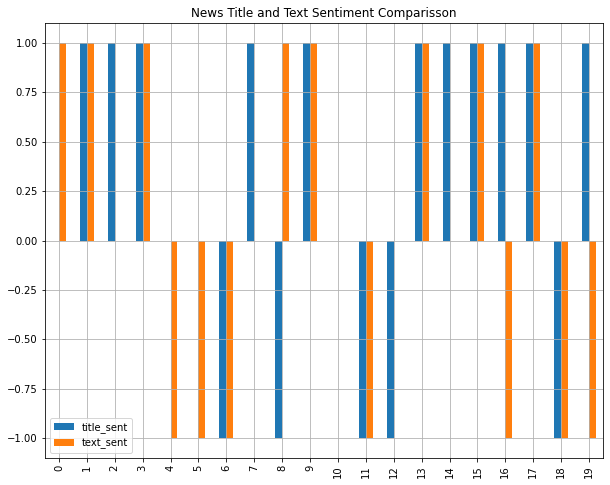

In [18]:
# Analyzing Sentiment Results via Plot
news_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [19]:
news_sent_df.describe()

,Unnamed: 0,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,9.50000,0.196900,0.187800,0.746400,0.065750,0.300000,0.093585,0.068000,0.886900,0.045150,0.050000
std,5.91608,0.427237,0.171381,0.161646,0.127883,0.864505,0.354508,0.059682,0.085597,0.053741,0.887041
min,0.00000,-0.612400,0.000000,0.505000,0.000000,-1.000000,-0.612400,0.000000,0.739000,0.000000,-1.000000
25%,4.75000,-0.025675,0.000000,0.635750,0.000000,-0.250000,-0.153100,0.000000,0.834250,0.000000,-1.000000
50%,9.50000,0.296000,0.216000,0.743500,0.000000,1.000000,0.000000,0.065000,0.892500,0.015500,0.000000
75%,14.25000,0.544875,0.278000,0.803500,0.034500,1.000000,0.345475,0.122500,0.937500,0.074000,1.000000
max,19.00000,0.807400,0.495000,1.000000,0.385000,1.000000,0.636900,0.171000,1.000000,0.147000,1.000000


In [26]:
file_path = Path("Resources/Stocks_News_Sentiment.csv")
news_sent_df.to_csv(file_path)

# Getting News about Tickers in 2021

In [20]:
# Fetch news about the tickers in 2021 in English
ticker_news_en = newsapi.get_everything(
    q="tickers AND 2021",
    sort_by="relevancy",
    language="en"
)

# Show the total number of news
ticker_news_en["totalResults"]

735

In [21]:
ticker_news_en

{'status': 'ok',
 'totalResults': 735,
 'articles': [{'source': {'id': 'business-insider',
    'name': 'Business Insider'},
   'author': 'Jaqueline Ting Quesada',
   'title': 'Goldman Sachs says buy these 33 stocks now as profits rebound for companies that suffered the most during the pandemic',
   'description': 'Summary List PlacementFor more than one year, individuals, businesses, and financial markets have faced challenges brought about by the pandemic.\xa0\nOn March 11, 2020, the World Health Organization declared COVID-19 a pandemic, news that drove US stocks straigh…',
   'url': 'https://www.businessinsider.com/stock-picks-to-buy-with-best-profitability-growth-estimates-gs-2021-4',
   'urlToImage': 'https://i.insider.com/606758de856cd700198a2ec5?width=1200&format=jpeg',
   'publishedAt': '2021-04-04T10:30:00Z',
   'content': 'For more than one year, individuals, businesses, and financial markets have faced challenges brought about by the pandemic.\xa0\r\nOn March 11, 2020, the W

In [22]:
# Transform the response dictionary to a DataFrame
tickers_df = pd.DataFrame.from_dict(ticker_news_en["articles"])

tickers_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'business-insider', 'name': 'Business I...",Jaqueline Ting Quesada,Goldman Sachs says buy these 33 stocks now as ...,"Summary List PlacementFor more than one year, ...",https://www.businessinsider.com/stock-picks-to...,https://i.insider.com/606758de856cd700198a2ec5...,2021-04-04T10:30:00Z,"For more than one year, individuals, businesse..."
1,"{'id': 'business-insider', 'name': 'Business I...",Jaqueline Ting Quesada,Bank of America names 9 stocks to buy as the v...,Summary List PlacementPeople have been digesti...,https://www.businessinsider.com/stock-picks-to...,https://i.insider.com/6051fdd80347cb00184b6348...,2021-03-17T15:01:00Z,People have been digesting positive news regar...
2,"{'id': None, 'name': 'HYPEBEAST'}","info@hypebeast.com (HYPEBEAST), HYPEBEAST","A$AP Rocky, Tame Impala and More Announced for...","The three-day, annual Las Vegas music festival...",https://hypebeast.com/2021/3/life-is-beautiful...,https://image-cdn.hypb.st/https%3A%2F%2Fhypebe...,2021-03-11T09:15:09Z,"The three-day, annual Las Vegas music festival..."
3,"{'id': None, 'name': 'Theregister.com'}",Lindsay Clark,"You wouldn’t know my new database, she goes to...",Plus: Ellison ramps up SAP trash-talking. At l...,https://www.theregister.com/2021/03/11/oracle_...,https://regmedia.co.uk/2021/03/11/shutterstock...,2021-03-11T13:12:17Z,Updated Oracle has underwhelmed the market wit...
4,"{'id': None, 'name': 'Theregister.com'}",Lindsay Clark,"You wouldn’t know my new database, she goes to...",Plus: Ellison ramps up SAP trash-talking. At l...,https://www.theregister.com/2021/03/11/you_wou...,https://regmedia.co.uk/2021/03/11/shutterstock...,2021-03-11T13:12:17Z,Oracle has underwhelmed the market with its Q3...


In [23]:
tickers_df.shape

(20, 8)

In [24]:
# Create a DataFrame for Ticker articles
def make_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"]

            article.append({
                "date": date,
                "title": title,
                "description": description,
                "text": text,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [25]:
# Look into ticker dataframe
ticker_df = make_df(ticker_news_en["articles"], "en")
ticker_df.head()

""
